In [130]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/marcio/Documents/fish_analyzer_final.csv", index_col=0)
import ast
df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)
df['head'] = df['head'].apply(ast.literal_eval)



In [131]:
df["pen"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-2])
df["ult"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-1])
#df["maximum"] = df["tail_coords"].apply(lambda x: max(tuple(zip(*x))[1][-1]))
#df["minimum"] = df["tail_coords"].apply(lambda x: min(tuple(zip(*x))[1]))

In [132]:
df

,sequence,tail_coords,head,pen,ult
1266,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16
1267,2,"((0, 0), (174, 0), (348, 0), (523, 0), (688, 55))","(673, 475)",0,55
1268,2,"((0, 0), (173, 0), (346, 18), (520, 20), (686,...","(676, 476)",20,72
1269,2,"((0, 0), (173, 0), (347, 0), (520, -18), (693,...","(679, 477)",-18,-19
1270,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0
...,...,...,...,...,...
2143,256,"((0, 0), (175, 0), (345, -38), (520, -31), (69...","(760, 500)",-31,-32
2144,256,"((0, 0), (175, 0), (340, -58), (512, -85), (68...","(754, 497)",-85,-64
2145,256,"((0, 0), (175, 0), (350, 0), (521, -36), (681,...","(749, 495)",-36,-108
2146,256,"((0, 0), (174, 0), (349, -16), (521, -50), (66...","(744, 490)",-50,-156


In [133]:
df["position"] = np.NaN

In [134]:
df["position"] = df.apply(lambda x: "up" if x["ult"] > x["pen"] else x["position"], axis=1)
df["position"] = df.apply(lambda x: "down" if x["ult"] < x["pen"] else x["position"], axis=1)



In [135]:
df

,sequence,tail_coords,head,pen,ult,position
1266,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16,up
1267,2,"((0, 0), (174, 0), (348, 0), (523, 0), (688, 55))","(673, 475)",0,55,up
1268,2,"((0, 0), (173, 0), (346, 18), (520, 20), (686,...","(676, 476)",20,72,up
1269,2,"((0, 0), (173, 0), (347, 0), (520, -18), (693,...","(679, 477)",-18,-19,down
1270,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0,NaN
...,...,...,...,...,...,...
2143,256,"((0, 0), (175, 0), (345, -38), (520, -31), (69...","(760, 500)",-31,-32,down
2144,256,"((0, 0), (175, 0), (340, -58), (512, -85), (68...","(754, 497)",-85,-64,up
2145,256,"((0, 0), (175, 0), (350, 0), (521, -36), (681,...","(749, 495)",-36,-108,down
2146,256,"((0, 0), (174, 0), (349, -16), (521, -50), (66...","(744, 490)",-50,-156,down


In [136]:
df["beating"] = np.NAN

sequence_number = 1
for i in range(0, len(df)):
    now = df.iloc[i]["position"]    
    if i == 0:        
        previous = now
        df.iloc[i, 6] = sequence_number      
        continue
    if now != previous:
        sequence_number = sequence_number + 1        
        df.iloc[i, 6] = sequence_number
        previous = now
        
    else:
        df.iloc[i, 6] = sequence_number
        previous = now
        
      
        
        

        
        
    
        




In [137]:
df.head(30)

,sequence,tail_coords,head,pen,ult,position,beating
1266,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16,up,1.0
1267,2,"((0, 0), (174, 0), (348, 0), (523, 0), (688, 55))","(673, 475)",0,55,up,1.0
1268,2,"((0, 0), (173, 0), (346, 18), (520, 20), (686,...","(676, 476)",20,72,up,1.0
1269,2,"((0, 0), (173, 0), (347, 0), (520, -18), (693,...","(679, 477)",-18,-19,down,2.0
1270,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0,NaN,3.0
1271,2,"((0, 0), (174, 0), (349, 0), (524, 0), (697, 19))","(685, 480)",0,19,up,4.0
1272,2,"((0, 0), (174, 0), (348, -20), (523, -19), (69...","(688, 480)",-19,17,up,4.0
1273,2,"((0, 0), (174, 0), (349, 0), (522, -20), (695,...","(690, 481)",-20,0,up,4.0
1274,2,"((0, 0), (173, 0), (347, 0), (521, 0), (695, 18))","(693, 481)",0,18,up,4.0
1275,2,"((0, 0), (173, 0), (347, -19), (520, -38), (69...","(695, 483)",-38,-57,down,5.0


In [138]:
df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()
for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    print(the_idxs)
    step = 0
    cycle_number = 1   
    for i in the_idxs:
        now = df.loc[i, "position"]
        print("the now")
        print(now)   
        if i == the_idxs[0]:        
            previous = now
            df.loc[i, "cycle"] = cycle_number            
            continue
        if (now == previous):        
            df.loc[i, "cycle"] = cycle_number
            previous = now
        else:
            step=step+1
            if step==1:
                df.loc[i, "cycle"] = cycle_number
                previous = now
            else:
                cycle_number=cycle_number+1            
                df.loc[i, "cycle"] = cycle_number
                previous = now
                step=0
                
            
    
    
    
    

2
Int64Index([1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275], dtype='int64')
the now
up
the now
up
the now
up
the now
down
the now
nan
the now
up
the now
up
the now
up
the now
up
the now
down
13
Int64Index([1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316,
            1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325],
           dtype='int64')
the now
up
the now
up
the now
up
the now
down
the now
down
the now
down
the now
up
the now
up
the now
up
the now
down
the now
down
the now
down
the now
up
the now
up
the now
down
the now
down
the now
down
the now
down
the now
down
the now
up
48
Int64Index([1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385], dtype='int64')
the now
up
the now
down
the now
down
the now
up
the now
up
the now
up
the now
down
the now
up
the now
up
the now
up
the now
up
49
Int64Index([1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397,
            1398, 1399, 1400, 1401, 1402, 1403, 1404],
           dtype='i

In [139]:
df.head(30)

,sequence,tail_coords,head,pen,ult,position,beating,cycle
1266,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16,up,1.0,1.0
1267,2,"((0, 0), (174, 0), (348, 0), (523, 0), (688, 55))","(673, 475)",0,55,up,1.0,1.0
1268,2,"((0, 0), (173, 0), (346, 18), (520, 20), (686,...","(676, 476)",20,72,up,1.0,1.0
1269,2,"((0, 0), (173, 0), (347, 0), (520, -18), (693,...","(679, 477)",-18,-19,down,2.0,1.0
1270,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0,NaN,3.0,2.0
1271,2,"((0, 0), (174, 0), (349, 0), (524, 0), (697, 19))","(685, 480)",0,19,up,4.0,2.0
1272,2,"((0, 0), (174, 0), (348, -20), (523, -19), (69...","(688, 480)",-19,17,up,4.0,2.0
1273,2,"((0, 0), (174, 0), (349, 0), (522, -20), (695,...","(690, 481)",-20,0,up,4.0,2.0
1274,2,"((0, 0), (173, 0), (347, 0), (521, 0), (695, 18))","(693, 481)",0,18,up,4.0,2.0
1275,2,"((0, 0), (173, 0), (347, -19), (520, -38), (69...","(695, 483)",-38,-57,down,5.0,3.0


In [140]:
#df["velocity"] = np.NaN

temp = df.groupby(["sequence", "cycle"])["tail_coords"].apply(lambda grp: 1/grp.count())
temp = temp.reset_index()

#df["velocity"] = temp["cycle"]

temp = temp.rename(columns={"tail_coords":"speed"})
        
temp      



,sequence,cycle,speed
0,2,1.0,0.250000
1,2,2.0,0.200000
2,2,3.0,1.000000
3,13,1.0,0.166667
4,13,2.0,0.166667
...,...,...,...
90,245,2.0,0.250000
91,245,3.0,0.250000
92,256,1.0,0.500000
93,256,2.0,0.250000


In [141]:
merged_speed = df.merge(temp, on=["sequence", "cycle"])

In [142]:
merged_speed.head(30)

,sequence,tail_coords,head,pen,ult,position,beating,cycle,speed
0,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16,up,1.0,1.0,0.250000
1,2,"((0, 0), (174, 0), (348, 0), (523, 0), (688, 55))","(673, 475)",0,55,up,1.0,1.0,0.250000
2,2,"((0, 0), (173, 0), (346, 18), (520, 20), (686,...","(676, 476)",20,72,up,1.0,1.0,0.250000
3,2,"((0, 0), (173, 0), (347, 0), (520, -18), (693,...","(679, 477)",-18,-19,down,2.0,1.0,0.250000
4,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0,NaN,3.0,2.0,0.200000
5,2,"((0, 0), (174, 0), (349, 0), (524, 0), (697, 19))","(685, 480)",0,19,up,4.0,2.0,0.200000
6,2,"((0, 0), (174, 0), (348, -20), (523, -19), (69...","(688, 480)",-19,17,up,4.0,2.0,0.200000
7,2,"((0, 0), (174, 0), (349, 0), (522, -20), (695,...","(690, 481)",-20,0,up,4.0,2.0,0.200000
8,2,"((0, 0), (173, 0), (347, 0), (521, 0), (695, 18))","(693, 481)",0,18,up,4.0,2.0,0.200000
9,2,"((0, 0), (173, 0), (347, -19), (520, -38), (69...","(695, 483)",-38,-57,down,5.0,3.0,1.000000


In [143]:

import math
temp = merged_speed.groupby(["sequence", "cycle"])
#temp = temp.reset_index()
the_firsts = temp.head(1)
the_lasts = temp.tail(1)
the_firsts["distance"] = np.NaN

for i in range(0, len(the_firsts)):
    #the_idxs = df.loc[df["sequence"] == i].index
    first_com = the_firsts.iloc[i, 2]
    last_com = the_lasts.iloc[i, 2]
    print(first_com)
    print(last_com)
    the_firsts.iloc[i, 9] = math.hypot((first_com[0] - last_com[0]), (first_com[1] - last_com[1]))
      
    
    



(670, 475)
(679, 477)
(682, 478)
(693, 481)
(695, 483)
(695, 483)
(764, 564)
(773, 586)
(774, 590)
(778, 607)
(779, 610)
(779, 631)
(779, 634)
(779, 634)
(735, 713)
(729, 717)
(726, 719)
(718, 727)
(715, 729)
(709, 739)
(707, 745)
(690, 771)
(688, 774)
(686, 782)
(770, 803)
(774, 799)
(777, 796)
(784, 789)
(787, 787)
(826, 749)
(830, 663)
(829, 659)
(829, 655)
(829, 644)
(829, 640)
(833, 614)
(791, 544)
(746, 542)
(694, 550)
(682, 549)
(678, 550)
(663, 551)
(659, 552)
(651, 552)
(641, 576)
(625, 598)
(622, 601)
(612, 613)
(610, 615)
(599, 626)
(597, 629)
(590, 639)
(587, 642)
(578, 653)
(575, 656)
(565, 671)
(563, 674)
(553, 691)
(551, 694)
(551, 694)
(551, 702)
(549, 709)
(547, 712)
(544, 732)
(544, 735)
(540, 749)
(539, 751)
(539, 751)
(611, 811)
(615, 810)
(619, 808)
(630, 806)
(634, 805)
(645, 802)
(648, 802)
(648, 802)
(660, 789)
(665, 786)
(669, 782)
(684, 771)
(688, 768)
(701, 758)
(706, 755)
(719, 744)
(722, 742)
(730, 735)
(734, 734)
(737, 731)
(747, 730)
(775, 727)
(780, 731)

<ipython-input-143-d0efc5147e81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_firsts["distance"] = np.NaN
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [144]:
merged_speed

,sequence,tail_coords,head,pen,ult,position,beating,cycle,speed
0,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16,up,1.0,1.0,0.25
1,2,"((0, 0), (174, 0), (348, 0), (523, 0), (688, 55))","(673, 475)",0,55,up,1.0,1.0,0.25
2,2,"((0, 0), (173, 0), (346, 18), (520, 20), (686,...","(676, 476)",20,72,up,1.0,1.0,0.25
3,2,"((0, 0), (173, 0), (347, 0), (520, -18), (693,...","(679, 477)",-18,-19,down,2.0,1.0,0.25
4,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0,NaN,3.0,2.0,0.20
...,...,...,...,...,...,...,...,...,...
398,256,"((0, 0), (175, 0), (345, -38), (520, -31), (69...","(760, 500)",-31,-32,down,161.0,2.0,0.25
399,256,"((0, 0), (175, 0), (340, -58), (512, -85), (68...","(754, 497)",-85,-64,up,162.0,3.0,0.25
400,256,"((0, 0), (175, 0), (350, 0), (521, -36), (681,...","(749, 495)",-36,-108,down,163.0,3.0,0.25
401,256,"((0, 0), (174, 0), (349, -16), (521, -50), (66...","(744, 490)",-50,-156,down,163.0,3.0,0.25


In [145]:
temp_max = merged_speed.groupby(["sequence", "cycle"])["ult"].max()
temp_max = temp_max.reset_index()
temp_max = temp_max.rename(columns={"ult":"ult_max"})

temp_min = merged_speed.groupby(["sequence", "cycle"])["ult"].min()
temp_min = temp_min.reset_index()
temp_min = temp_min.rename(columns={"ult":"ult_min"})


In [146]:
temp_max

,sequence,cycle,ult_max
0,2,1.0,72
1,2,2.0,19
2,2,3.0,-57
3,13,1.0,86
4,13,2.0,97
...,...,...,...
90,245,2.0,-28
91,245,3.0,43
92,256,1.0,-1
93,256,2.0,-18


In [147]:
merged_speed = merged_speed.merge(temp_max, on=["sequence", "cycle"])
merged_speed = merged_speed.merge(temp_min, on=["sequence", "cycle"])

merged_speed

,sequence,tail_coords,head,pen,ult,position,beating,cycle,speed,ult_max,ult_min
0,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16,up,1.0,1.0,0.25,72,-19
1,2,"((0, 0), (174, 0), (348, 0), (523, 0), (688, 55))","(673, 475)",0,55,up,1.0,1.0,0.25,72,-19
2,2,"((0, 0), (173, 0), (346, 18), (520, 20), (686,...","(676, 476)",20,72,up,1.0,1.0,0.25,72,-19
3,2,"((0, 0), (173, 0), (347, 0), (520, -18), (693,...","(679, 477)",-18,-19,down,2.0,1.0,0.25,72,-19
4,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0,NaN,3.0,2.0,0.20,19,0
...,...,...,...,...,...,...,...,...,...,...,...
398,256,"((0, 0), (175, 0), (345, -38), (520, -31), (69...","(760, 500)",-31,-32,down,161.0,2.0,0.25,-18,-127
399,256,"((0, 0), (175, 0), (340, -58), (512, -85), (68...","(754, 497)",-85,-64,up,162.0,3.0,0.25,-51,-156
400,256,"((0, 0), (175, 0), (350, 0), (521, -36), (681,...","(749, 495)",-36,-108,down,163.0,3.0,0.25,-51,-156
401,256,"((0, 0), (174, 0), (349, -16), (521, -50), (66...","(744, 490)",-50,-156,down,163.0,3.0,0.25,-51,-156


In [148]:
merged_speed["amplitude"] = abs(merged_speed["ult_max"]-merged_speed["ult_min"])

In [149]:
merged_speed

,sequence,tail_coords,head,pen,ult,position,beating,cycle,speed,ult_max,ult_min,amplitude
0,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16,up,1.0,1.0,0.25,72,-19,91
1,2,"((0, 0), (174, 0), (348, 0), (523, 0), (688, 55))","(673, 475)",0,55,up,1.0,1.0,0.25,72,-19,91
2,2,"((0, 0), (173, 0), (346, 18), (520, 20), (686,...","(676, 476)",20,72,up,1.0,1.0,0.25,72,-19,91
3,2,"((0, 0), (173, 0), (347, 0), (520, -18), (693,...","(679, 477)",-18,-19,down,2.0,1.0,0.25,72,-19,91
4,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0,NaN,3.0,2.0,0.20,19,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...
398,256,"((0, 0), (175, 0), (345, -38), (520, -31), (69...","(760, 500)",-31,-32,down,161.0,2.0,0.25,-18,-127,109
399,256,"((0, 0), (175, 0), (340, -58), (512, -85), (68...","(754, 497)",-85,-64,up,162.0,3.0,0.25,-51,-156,105
400,256,"((0, 0), (175, 0), (350, 0), (521, -36), (681,...","(749, 495)",-36,-108,down,163.0,3.0,0.25,-51,-156,105
401,256,"((0, 0), (174, 0), (349, -16), (521, -50), (66...","(744, 490)",-50,-156,down,163.0,3.0,0.25,-51,-156,105


In [150]:
merged_speed["amplitude/frequency"] = merged_speed["amplitude"]/merged_speed["speed"]
merged_speed

,sequence,tail_coords,head,pen,ult,position,beating,cycle,speed,ult_max,ult_min,amplitude,amplitude/frequency
0,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16,up,1.0,1.0,0.25,72,-19,91,364.0
1,2,"((0, 0), (174, 0), (348, 0), (523, 0), (688, 55))","(673, 475)",0,55,up,1.0,1.0,0.25,72,-19,91,364.0
2,2,"((0, 0), (173, 0), (346, 18), (520, 20), (686,...","(676, 476)",20,72,up,1.0,1.0,0.25,72,-19,91,364.0
3,2,"((0, 0), (173, 0), (347, 0), (520, -18), (693,...","(679, 477)",-18,-19,down,2.0,1.0,0.25,72,-19,91,364.0
4,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0,NaN,3.0,2.0,0.20,19,0,19,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,256,"((0, 0), (175, 0), (345, -38), (520, -31), (69...","(760, 500)",-31,-32,down,161.0,2.0,0.25,-18,-127,109,436.0
399,256,"((0, 0), (175, 0), (340, -58), (512, -85), (68...","(754, 497)",-85,-64,up,162.0,3.0,0.25,-51,-156,105,420.0
400,256,"((0, 0), (175, 0), (350, 0), (521, -36), (681,...","(749, 495)",-36,-108,down,163.0,3.0,0.25,-51,-156,105,420.0
401,256,"((0, 0), (174, 0), (349, -16), (521, -50), (66...","(744, 490)",-50,-156,down,163.0,3.0,0.25,-51,-156,105,420.0


In [151]:
the_firsts = the_firsts[["sequence", "cycle", "distance"]]
the_firsts

,sequence,cycle,distance
0,2,1.0,9.219544
4,2,2.0,11.401754
9,2,3.0,0.000000
10,13,1.0,23.769729
16,13,2.0,17.464249
...,...,...,...
385,245,2.0,12.041595
389,245,3.0,11.180340
393,256,1.0,7.211103
395,256,2.0,19.723083


In [152]:
merged_speed = merged_speed.merge(the_firsts, on=["sequence", "cycle"])

In [153]:
merged_speed

,sequence,tail_coords,head,pen,ult,position,beating,cycle,speed,ult_max,ult_min,amplitude,amplitude/frequency,distance
0,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16,up,1.0,1.0,0.25,72,-19,91,364.0,9.219544
1,2,"((0, 0), (174, 0), (348, 0), (523, 0), (688, 55))","(673, 475)",0,55,up,1.0,1.0,0.25,72,-19,91,364.0,9.219544
2,2,"((0, 0), (173, 0), (346, 18), (520, 20), (686,...","(676, 476)",20,72,up,1.0,1.0,0.25,72,-19,91,364.0,9.219544
3,2,"((0, 0), (173, 0), (347, 0), (520, -18), (693,...","(679, 477)",-18,-19,down,2.0,1.0,0.25,72,-19,91,364.0,9.219544
4,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0,NaN,3.0,2.0,0.20,19,0,19,95.0,11.401754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,256,"((0, 0), (175, 0), (345, -38), (520, -31), (69...","(760, 500)",-31,-32,down,161.0,2.0,0.25,-18,-127,109,436.0,19.723083
399,256,"((0, 0), (175, 0), (340, -58), (512, -85), (68...","(754, 497)",-85,-64,up,162.0,3.0,0.25,-51,-156,105,420.0,18.027756
400,256,"((0, 0), (175, 0), (350, 0), (521, -36), (681,...","(749, 495)",-36,-108,down,163.0,3.0,0.25,-51,-156,105,420.0,18.027756
401,256,"((0, 0), (174, 0), (349, -16), (521, -50), (66...","(744, 490)",-50,-156,down,163.0,3.0,0.25,-51,-156,105,420.0,18.027756


In [154]:
graphs = merged_speed.groupby(["sequence", "cycle"])
to_graphs = graphs.head(1)
to_graphs


,sequence,tail_coords,head,pen,ult,position,beating,cycle,speed,ult_max,ult_min,amplitude,amplitude/frequency,distance
0,2,"((0, 0), (173, 0), (347, -20), (521, -19), (69...","(670, 475)",-19,16,up,1.0,1.0,0.250000,72,-19,91,364.0,9.219544
4,2,"((0, 0), (175, 0), (350, 0), (525, 0), (700, 0))","(682, 478)",0,0,NaN,3.0,2.0,0.200000,19,0,19,95.0,11.401754
9,2,"((0, 0), (173, 0), (347, -19), (520, -38), (69...","(695, 483)",-38,-57,down,5.0,3.0,1.000000,-57,-57,0,0.0,0.000000
10,13,"((0, 0), (174, 0), (345, 37), (516, 69), (691,...","(764, 564)",69,83,up,6.0,1.0,0.166667,86,-37,123,738.0,23.769729
16,13,"((0, 0), (175, 0), (346, 34), (518, 65), (690,...","(774, 590)",65,97,up,8.0,2.0,0.166667,97,-18,115,690.0,17.464249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,245,"((0, 0), (175, 0), (349, -18), (520, -52), (68...","(839, 628)",-52,-118,down,155.0,2.0,0.250000,-28,-118,90,360.0,12.041595
389,245,"((0, 0), (175, 0), (345, -37), (513, -86), (68...","(840, 612)",-86,-114,down,157.0,3.0,0.250000,43,-274,317,1268.0,11.180340
393,256,"((0, 0), (174, 0), (348, -18), (520, -53), (68...","(789, 517)",-53,-1,up,158.0,1.0,0.500000,-1,-34,33,66.0,7.211103
395,256,"((0, 0), (175, 0), (345, -38), (518, -69), (68...","(777, 510)",-69,-18,up,160.0,2.0,0.250000,-18,-127,109,436.0,19.723083


<AxesSubplot:>

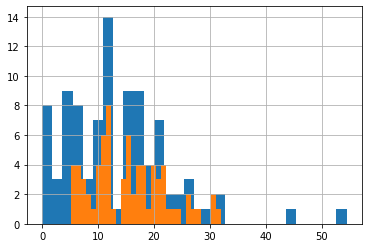

In [155]:
sorted = to_graphs.sort_values(by=['distance'], ascending=False)
len(sorted)
hist = sorted["distance"].hist(bins=30)

filtered_to_graphs = to_graphs.loc[(to_graphs["distance"] > 5) & (to_graphs["distance"] < 40)]
filtered_to_graphs = filtered_to_graphs.loc[(filtered_to_graphs["amplitude"] < 300)]

filtered_to_graphs["distance"].hist(bins=30)


In [156]:
import seaborn as sns

In [157]:
to_graphs = filtered_to_graphs

1.364562345302611e-23
Decimal Representation: 0.000000000000000000000013645623


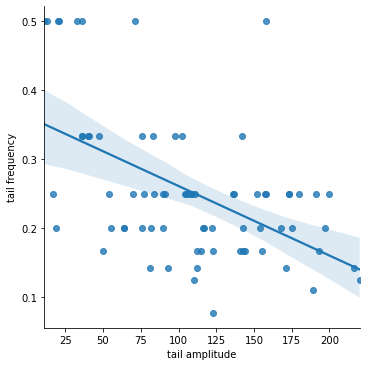

In [158]:
from scipy.stats import spearmanr

ax = sns.lmplot(data=to_graphs, x="amplitude", y="speed")
ax.set(xlabel='tail amplitude', ylabel='tail frequency')

r, pvalue = spearmanr(merged_speed["amplitude"], merged_speed["speed"])
print(pvalue)
print(f"Decimal Representation: {pvalue:.30f}")


1.6281048687111448e-16
Decimal Representation: 0.000000000000000162810486871114


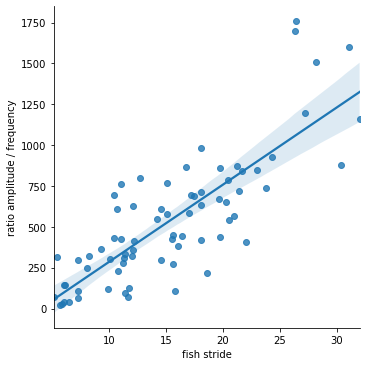

In [159]:
from scipy.stats import spearmanr

ax = sns.lmplot(data=to_graphs, x="distance", y="amplitude/frequency")
r, pvalue = spearmanr(to_graphs["distance"], to_graphs["amplitude/frequency"])
ax.set(xlabel='fish stride', ylabel='ratio amplitude / frequency')

print(pvalue)
print(f"Decimal Representation: {pvalue:.30f}")




1.1538970407267496e-07
Decimal Representation: 0.000000115389704072674964861696


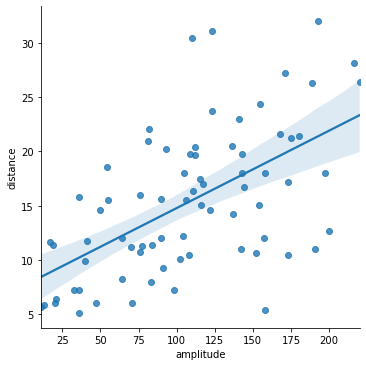

In [160]:
sns.lmplot(data=to_graphs, x="amplitude", y="distance")
r, pvalue = spearmanr(to_graphs["amplitude"], to_graphs["distance"])
print(pvalue)
print(f"Decimal Representation: {pvalue:.30f}")


3.28665433650059e-19
Decimal Representation: 0.000000000000000000328665433650


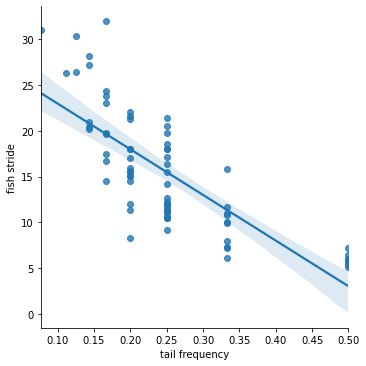

In [161]:
ax = sns.lmplot(data=to_graphs, x="speed", y="distance")
r, pvalue = spearmanr(to_graphs["speed"], to_graphs["distance"])
ax.set(xlabel='tail frequency', ylabel='fish stride')

print(pvalue)
print(f"Decimal Representation: {pvalue:.30f}")
